In [1]:
import pandas as pd

In [18]:
file_path = "./02_data_통합본/df_bus_card_tot.csv"
df_bus_card_tot = pd.read_csv(file_path)
dic = {"기준시각(분)" : "기준시간(분)", "기준시각" : "기준시간"}
df_bus_card_tot.rename(columns=dic)


,승차시각,하차시각,승객연령,환승여부,추가운임여부,승차정류장,하차정류장,버스내체류시간(분),기준년도,기준월,기준일,기준시간,기준시간(분)
0,2020-01-02 05:10:49,2020-01-02 05:18:44,일반,N,N,양덕차고지,동부초등학교,7.92,2020,1,2,5,10
1,2020-01-02 05:13:38,2020-01-02 05:45:49,일반,N,N,문덕사거리,새마을금고해도지점,32.18,2020,1,2,5,13
2,2020-01-02 05:15:49,2020-01-02 05:19:30,일반,N,N,문덕사거리,성우오토모티브,3.68,2020,1,2,5,15
3,2020-01-02 05:16:17,2020-01-02 05:50:46,일반,N,N,부영사랑3차,오거리,34.48,2020,1,2,5,16
4,2020-01-02 05:18:41,2020-01-02 05:23:10,일반,N,N,문덕온천,용덕사거리,4.48,2020,1,2,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842603,2020-03-31 23:15:29,2020-03-31 23:20:33,일반,N,N,법원사거리,농협하나로클럽,5.07,2020,3,31,23,15
842604,2020-03-31 23:16:51,2020-03-31 23:20:54,일반,N,N,LG빌라입구,대잠중앙하이츠,4.05,2020,3,31,23,16
842605,2020-03-31 23:38:06,2020-03-31 23:45:46,일반,N,N,대동우방아파트,상대시장,7.67,2020,3,31,23,38
842606,2020-03-31 23:48:33,2020-03-31 23:59:54,일반,N,N,해병대서문,부영사랑3차,11.35,2020,3,31,23,48


In [3]:
# 기본 시각화 라이브러리
import matplotlib
import matplotlib.pyplot as plt

# 기본 시각화보다 고급스러운 스타일의 시각화 라이브러리
import seaborn as sns

# 시각화를 위한 font 지정(한글 깨짐 방지)
from matplotlib import font_manager, rc

# 사용자의 os 확인 가능한 라이브러리
import platform

# 한글 font 설정 (window 기준)
plt.rc("font", family="Malgun Gothic")

# 시각화 시 마이너스(-, 음수) 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

# 1. 기준월 및 기준일자별 버스 이용량 분석 비교
- 기준월 및 기준일자별 버스 이용량 count 집계하기

In [4]:
df_pivot = df_bus_card_tot.pivot_table(values ="승객연령",
                                index  ="기준월",
                                columns="기준일",
                                aggfunc="count")

In [5]:
df_pivot = df_pivot.fillna(0)
df_pivot 

기준일,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
기준월,,,,,,,,,,,,,,,,,,,,,
1,9365.0,16164.0,16590.0,12530.0,9515.0,15474.0,12981.0,15785.0,16760.0,17495.0,...,17229.0,17399.0,9112.0,5923.0,7770.0,5468.0,14464.0,16034.0,15868.0,16186.0
2,11801.0,8523.0,15830.0,15488.0,14902.0,14376.0,15700.0,11358.0,8316.0,15582.0,...,5654.0,2898.0,5932.0,4469.0,5344.0,5417.0,5488.0,3757.0,0.0,0.0
3,2399.0,6538.0,5691.0,5976.0,5828.0,6150.0,4111.0,2826.0,6879.0,5336.0,...,0.0,0.0,0.0,131.0,2889.0,4976.0,3868.0,1241.0,5143.0,2487.0


<Figure size 2000x1000 with 0 Axes>

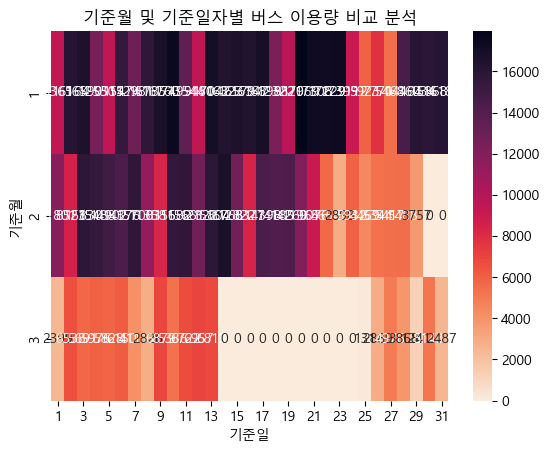

In [6]:
# 그래프 사이즈 정의하기 (너비, 높이)
plt.figure(figsize=(20,10))
plt.show()

plt.title("기준월 및 기준일자별 버스 이용량 비교 분석")

# annot : 박스 안에 숫자를 보이게 할 것인지 정의
# fmt : 소수점 자릿수 정의
# cmap : 색상맵(색상지도), 즉 어떤 색상 그룹을 사용할지 지정 (인터넷에 매우 많은 색상맵이 존재)
sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="rocket_r")

plt.show()

In [7]:
### [숙제]
# - 위 코드를 이용해서...
# - 기준일 및 기준시간, 기준시간 및 기준(분) 각각에 대한 히트맵을 시각화할 수 있는 함수 정의해서 사용하기
# - 함수명 : heatmapView

In [8]:
def heatmapView(df, index, columns, values="승객연령", aggfunc="count", annot=True, title="pivot_table의 히트맵"):
    df_pivot = df.pivot_table(values =values,
                              index  =index,
                              columns=columns,
                              aggfunc=aggfunc)
    # 결치값 0으로 대치
    df_pivot = df_pivot.fillna(0)
    # 사이즈 결정
    plt.figure(figsize=(20,10))
    plt.title(title)
    sns.heatmap(df_pivot, annot=annot, fmt=".0f", cmap="rocket_r")
    plt.show()

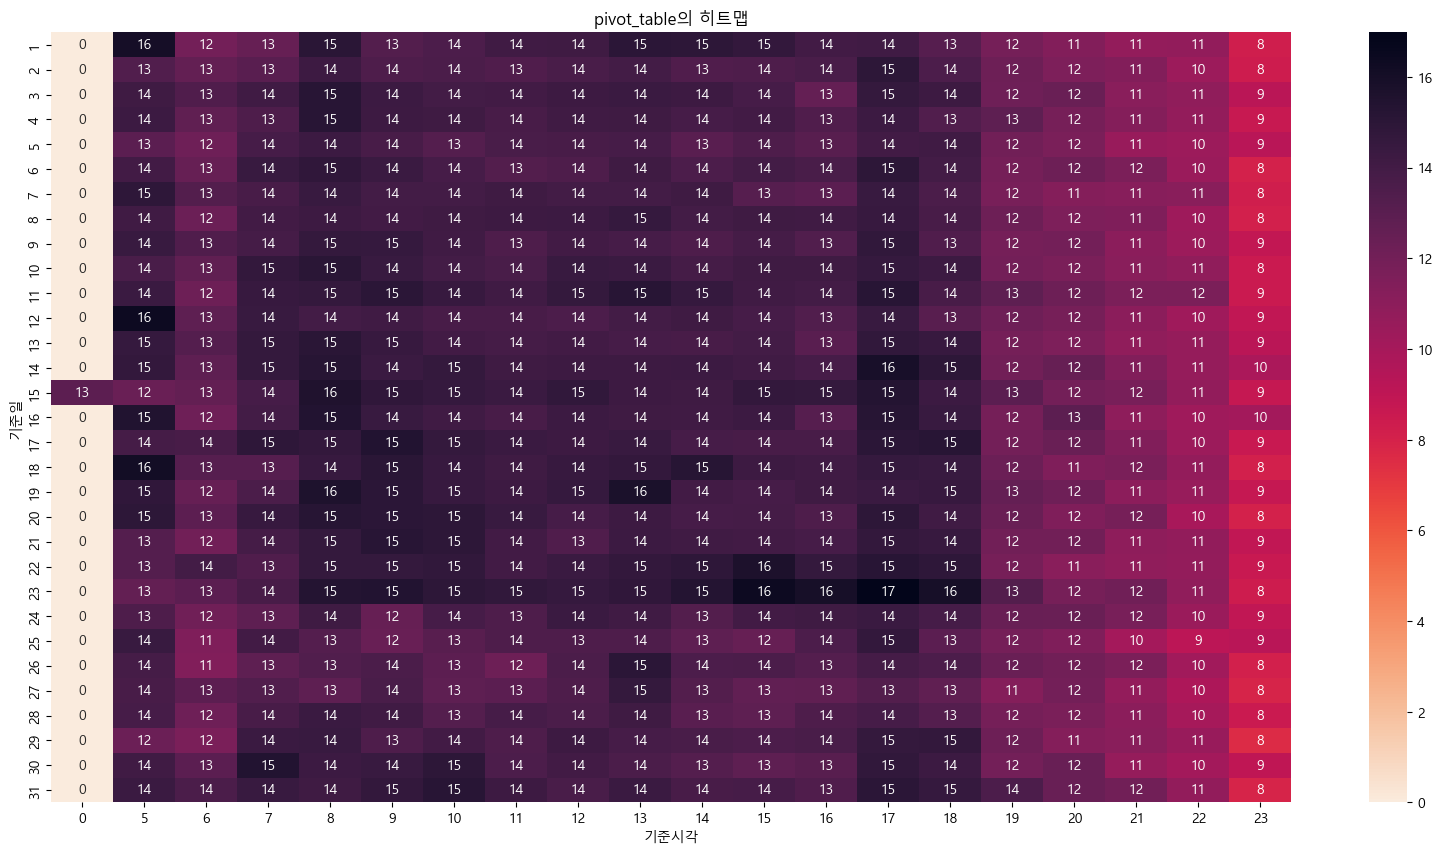

In [9]:
heatmapView(df_bus_card_tot, values="버스내체류시간(분)", index="기준일", columns="기준시각", aggfunc="median")

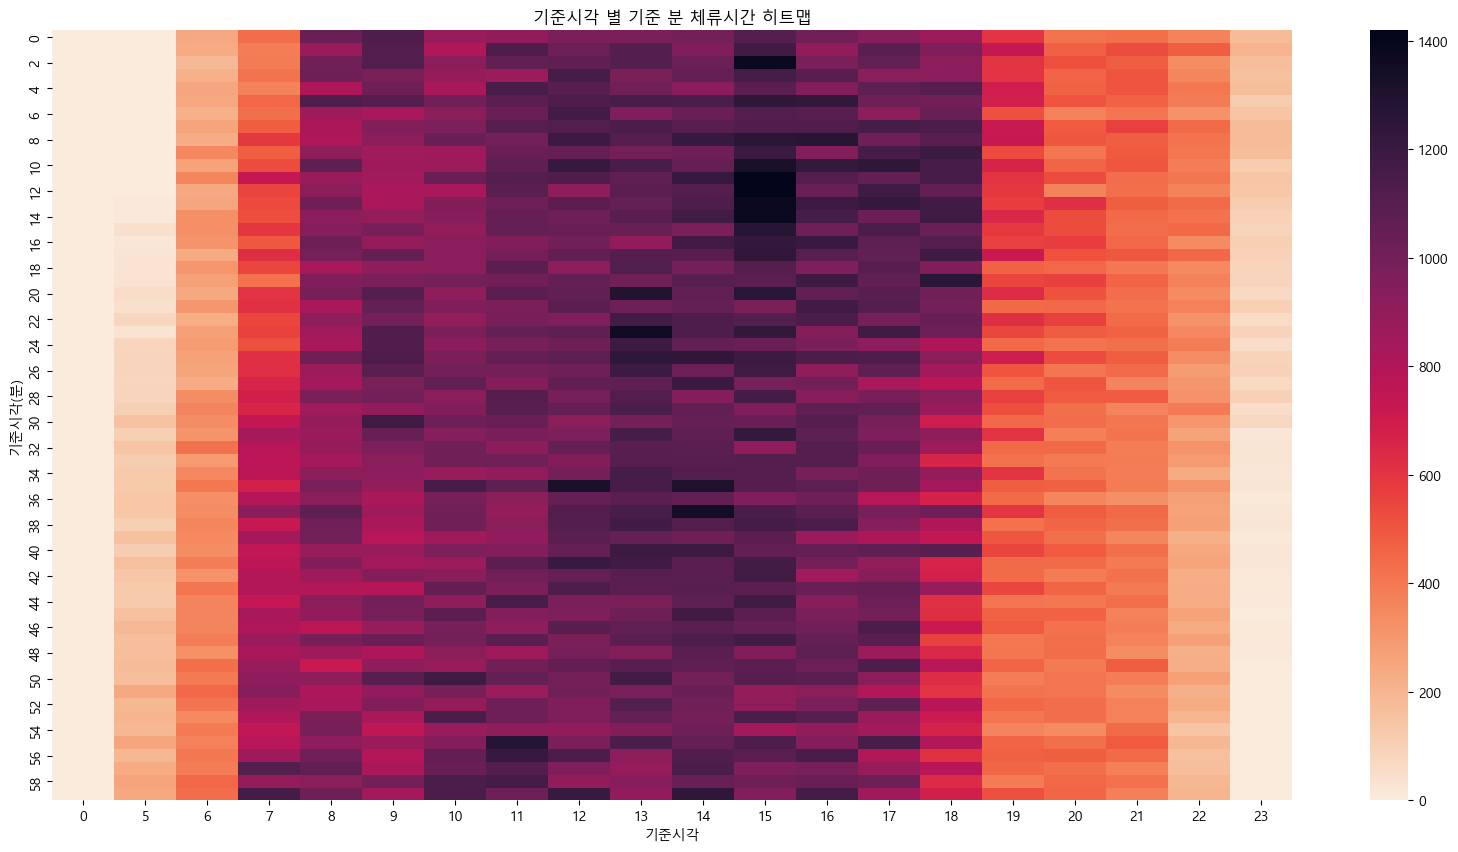

In [15]:
heatmapView(df_bus_card_tot, columns="기준시각", index="기준시각(분)", annot=False, title="기준시각 별 기준 분 체류시간 히트맵")

# 시간대별 승객연령별 버스내 체류시간(분) 분석
- x 축 : 시간
- y 축 : 체류시간(분)
    - 막대그래프 그리기
    - 막대그래프를 그리기 위해서는 각 X축 ,Y축, 막대범주에 대한 데이터를 별도 데이터프레임으로 담아서 사용

In [20]:
# 3개의 값을 담을 데이터프레임 정의
df_temp = pd.DataFrame()

# x 축에 사용할 컬럼 생성
df_temp["기준시각"] = df_bus_card_tot["기준시각"]

# y 축에 사용할 컬럼 생성
df_temp["버스내체류시간(분)"] = df_bus_card_tot["버스내체류시간(분)"]

# 막대 범주로 사용할 컬럼 생성
df_temp["승객연령"] = df_bus_card_tot["승객연령"]

In [21]:
df_temp

,기준시각,버스내체류시간(분),승객연령
0,5,7.92,일반
1,5,32.18,일반
2,5,3.68,일반
3,5,34.48,일반
4,5,4.48,일반
...,...,...,...
842603,23,5.07,일반
842604,23,4.05,일반
842605,23,7.67,일반
842606,23,11.35,일반


In [24]:
df_temp["승객연령"].value_counts()

승객연령
일반     772599
청소년     59037
어린이     10047
Name: count, dtype: int64

In [32]:
# as_index=False : 그룹 단위로 표현하는 방식 -> 행렬 단위의 데이터프레임 형태로 변환
df_tmp2 = (df_temp.groupby(["기준시각", "승객연령"], as_index=False).sum()).sort_values(by=["버스내체류시간(분)"], ascending=False)

In [39]:
df_tmp2.head()

,기준시각,승객연령,버스내체류시간(분)
32,15,일반,1056674.44
29,14,일반,1040204.89
26,13,일반,1031291.25
23,12,일반,983094.10
20,11,일반,981817.91


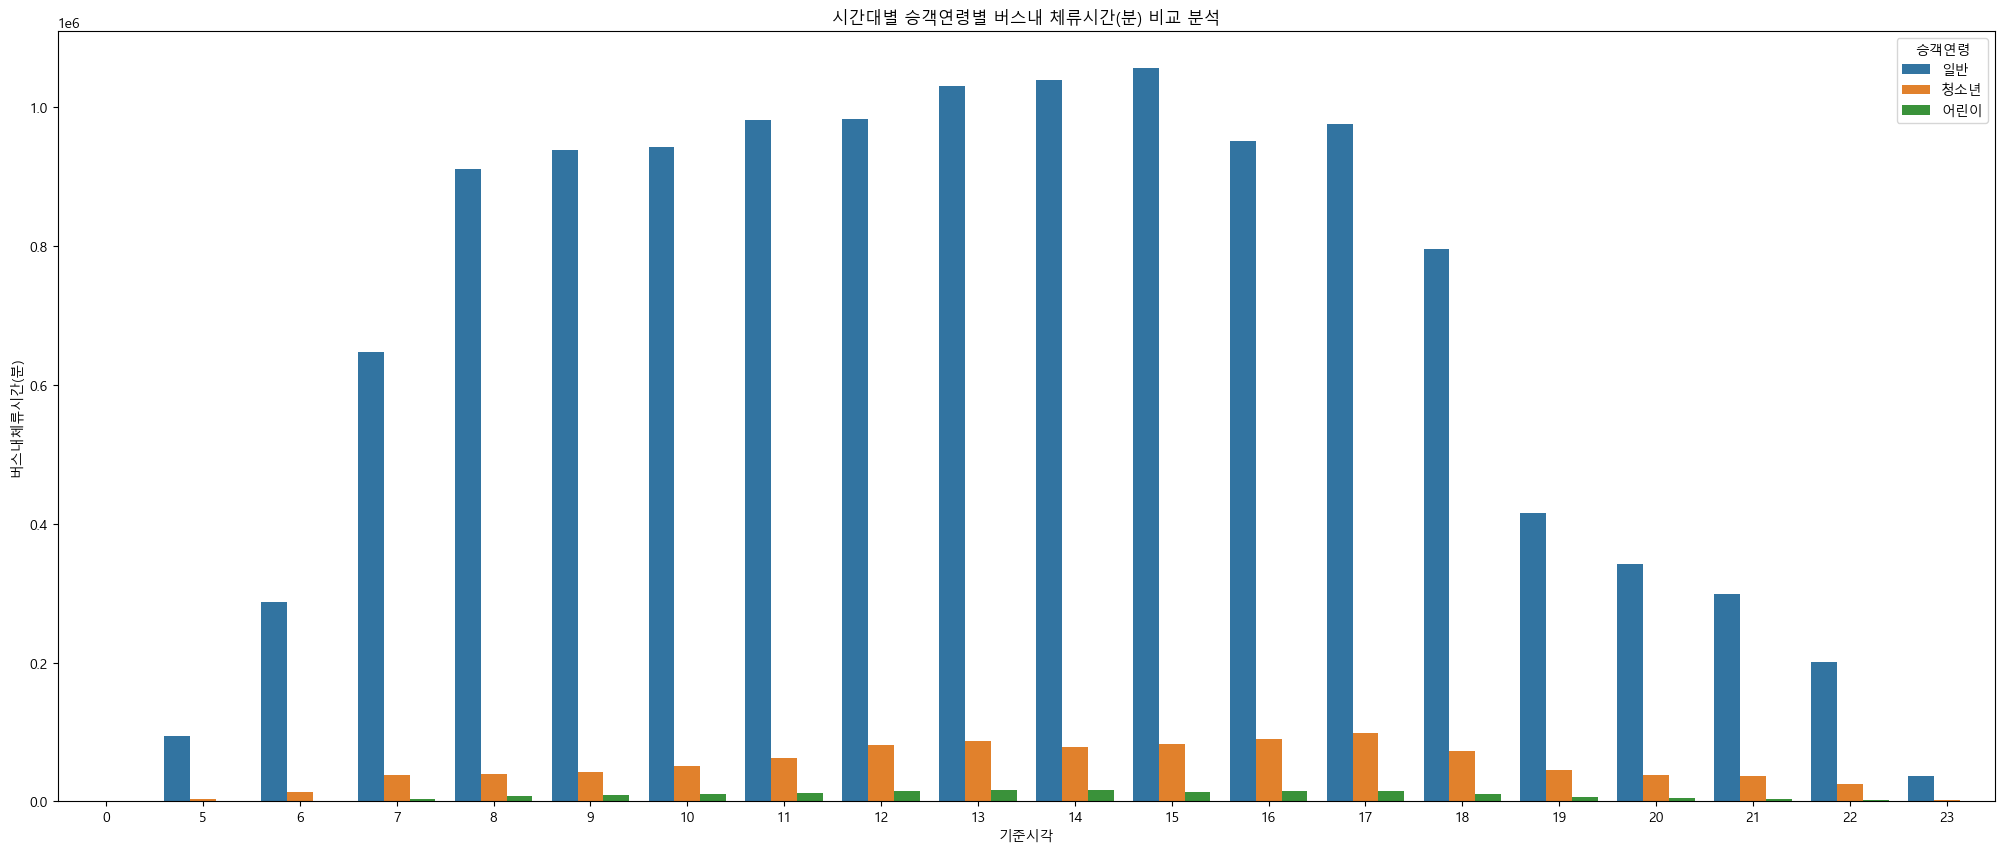

In [38]:
plt.figure(figsize=(25, 10))

plt.title("시간대별 승객연령별 버스내 체류시간(분) 비교 분석")

# hue : 범주 데이터를 가지는 컬럼 지정
sns.barplot(x="기준시각", y="버스내체류시간(분)", hue="승객연령", data=df_tmp2)

plt.show()

# 시간대별 승객연령 빈도(비율) 그래프 그리기
- 히스토그램 그래프 사용

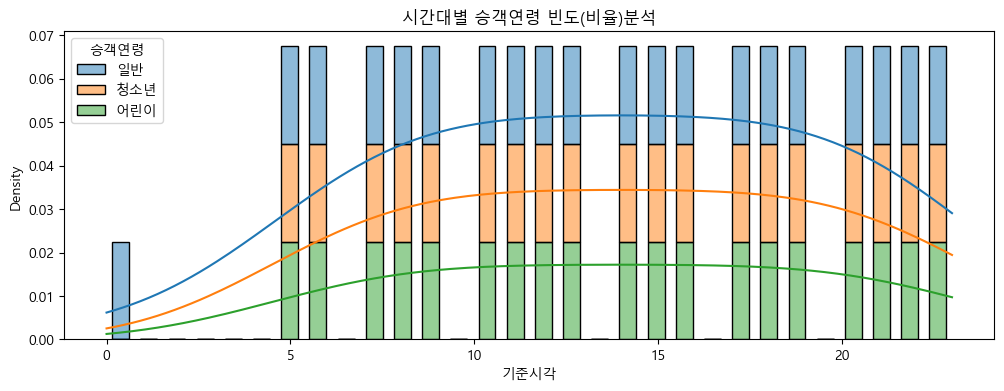

In [40]:
plt.figure(figsize=(12, 4));

plt.title("시간대별 승객연령 빈도(비율)분석")

sns.histplot(data = df_tmp2,
             x = "기준시각",
             bins = 30,           # 막대의 갯수
             kde = True,          # 막대그래프의 선그리그(밀도-빈도 선)
             hue = "승객연령",     # 사용할 번주 데이터
             multiple = "stack",  # 각 범주를 쌓아 올리는 방식으로 표현
             stat = "density",    # 막대를 비율(밀도)로 표현 
             shrink = 0.6)        # 막대의 넓이 조절(0.6은 60%)

plt.show()

# [승하차정류장별 버스내 체류시간]
- 승하차정류장 구간별 버스내 체류시간(1분)이 가장 높은 상위 30건 분석 비교

In [42]:
df_temp3 = pd.DataFrame()
df_temp3["버스내체류시간(분)"] = df_bus_card_tot["버스내체류시간(분)"]
df_temp3["승하차정류장"] = df_bus_card_tot["승차정류장"] + " -> " + df_bus_card_tot["하차정류장"]

- 승하차정류장 별로 그룹을 지어서 버스내체류시간을 합한 후 
- 버스내체류시간을 기중으로 내림차순 정렬
- 최종결과를 담을 변수 : df_tmp_sel

In [52]:
df_tmp_sel_30 = df_temp3.groupby(["승하차정류장"], as_index=False).sum().sort_values(by=["버스내체류시간(분)"], ascending=False)[:30]

In [54]:
df_tmp_sel_30.head()

,승하차정류장,버스내체류시간(분)
14059,시외버스터미널 -> 죽도시장,107186.11
27379,흥해환승센터 -> 죽도시장,66116.34
27385,흥해환승센터 -> 중앙상가,48417.60
21204,죽도시장 -> 흥해환승센터,44503.33
13820,시외버스터미널 -> 구룡포환승센터,41560.22


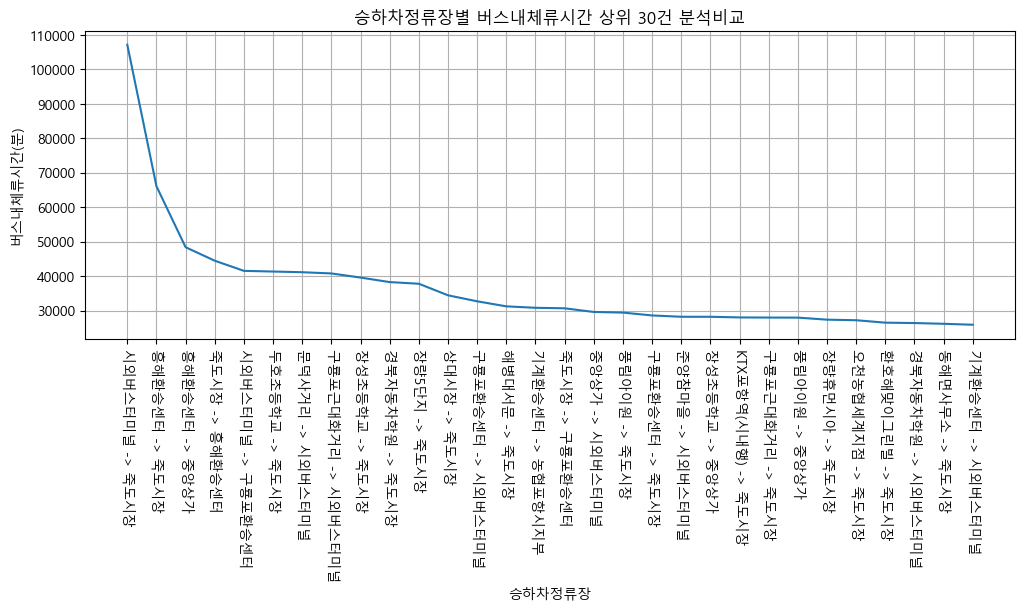

In [65]:
plt.figure(figsize=(12,4))

plt.title("승하차정류장별 버스내체류시간 상위 30건 분석비교")

# 선그리기 
# x축 : 승하차정류장
# y축 : 버스내체류시간(분)
plt.plot(df_tmp_sel_30["승하차정류장"], df_tmp_sel_30["버스내체류시간(분)"])

# x 축 제목
plt.xlabel("승하차정류장")
# y 축 제목
plt.ylabel("버스내체류시간(분)")

# x 축 표시값의 각도 조절
plt.xticks(rotation=270)

# 그래프내 그리드선 그리기
plt.grid(True)

# 그래프 이미지 파일로 저장
save_path = "./image/img01.png"
plt.savefig(save_path)

plt.show()